In [24]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 28 21:54:28 2020

@author: Dave
"""

while 1:
    menu = "What would you like to do? \n 1. Enter your ID number \n 2. Exit \n Enter an option."
    
    x = int(input(menu))
    
    if x == 1:
        
        from bs4 import BeautifulSoup, SoupStrainer
        import requests

        parkrun_id = float(input("Enter the numerical part of your parkrun id (excluding the A prefix) "))

        #if parkrun_id >= 0 and isinstance(parkrun_id, int) is True:

        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1; rv:7.0.1) Gecko/20100101 Firefox/7.0.1'}
        prefix = 'https://www.parkrun.org.uk/'
        # Commented out below so not run by mistake (n.b. 403 error)
        webpage_response = requests.get('https://www.parkrun.org.uk/results/athleteresultshistory/?athleteNumber=' + str(parkrun_id), headers = headers)

        webpage = webpage_response.content
        #parse_only = SoupStrainer("a",{'class': 'review_link'})
        soup = BeautifulSoup(webpage, "html.parser", parse_only=SoupStrainer('a'))
        #print(soup)

        links = []

        # This will scrape the page based on the individual's parkrun id entered above
        search_str = 'athletehistory?athleteNumber=' + str(parkrun_id)

        # Output below : I have moved the code into the next cell but do not want to run this cell again 
        # as it may get me a 403 FORBIDDEN again. 

        #else:
        #    print("Not a valid input. Please enter your id.")

    elif x == 2:
        print("Good bye")
        break
        
    else:
        print("Not a valid input. Try again.")
        


What would you like to do? 
 1. Enter your ID number 
 2. Exit 
 Enter an option.1
Enter the numerical part of your parkrun id (excluding the A prefix) 3378270
What would you like to do? 
 1. Enter your ID number 
 2. Exit 
 Enter an option.2
Good bye


In [25]:
import re
import pandas as pd

# Adds all link from soup onto links list
for link in soup: 
    if link.has_attr('href'):
        links.append(link['href'])
#print(links)

# Filters out links other than relevant event link string using search_str
event_links = []
for a in links:
    
    if search_str in a:
        event_links.append(a)
        #print(link['href'])
print(event_links)   

['https://www.parkrun.org.uk/lydiard/results/athletehistory?athleteNumber=3378270.0', 'https://www.parkrun.org.uk/cirencester/results/athletehistory?athleteNumber=3378270.0', 'https://www.parkrun.org.uk/sevenfields/results/athletehistory?athleteNumber=3378270.0', 'https://www.parkrun.org.uk/torbayvelopark/results/athletehistory?athleteNumber=3378270.0']


In [26]:
soup_name = BeautifulSoup(webpage, "html.parser", parse_only=SoupStrainer('h2'))
print(soup_name)

for i in soup_name:
    runner_name = i.get_text(',')

print(runner_name)

<h2>Adrian FISHER (26 parkruns)
        </h2>
Adrian FISHER (26 parkruns)
        


In [27]:
from itertools import repeat
import matplotlib.pyplot as plt
import numpy as np

#follow each link:
run_data = []
event_list = []

for course in event_links: 

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1; rv:7.0.1) Gecko/20100101 Firefox/7.0.1'}
    webpage_new = requests.get(course, headers = headers)
    new_soup = BeautifulSoup(webpage_new.content, "html.parser") #, parse_only=SoupStrainer('table')
    #pretty_soup = new_soup.prettify()
    #print(pretty_soup)
    running = new_soup.find_all('td')

    for r in running[16:]:     # Don't need first 16 items from each page
            run_data.append(r.get_text(','))
#            results_text = r.get_text(',')
    #print(results_text)

    #print(results[1:2])

#    split_text = results_text.split(',')
    
    soup_h3 = new_soup.find_all('h3')

    for j in soup_h3:
        venue_string = j.get_text(',')
        venue_name = venue_string.split(' parkrun')[0]
    
    soup_h2 = new_soup.find_all('h2')     
    
    for k in soup_h2:
        run_string = k.get_text(',')
        venue_count =  run_string.split(' ')[3]
    
    #convert venue_count to integer format:
        venue_count = int(venue_count)
        
        #add venue_name venue_count times to the list
        event_list.extend(repeat(venue_name, venue_count))

print(run_data)
#print(df.head())

['2017', '00:28:47', '55.24%', '2018', '00:28:31', '56.22%', '2019', '00:29:12', '55.42%', '2020', '00:31:05', '52.06%', '15/02/2020', '485', '179', '31:05', '52.06%', '\n                                \xa0\n                                ', '16/11/2019', '471', '210', '29:14', '55.36%', '\n                                \xa0\n                                ', '12/10/2019', '466', '221', '29:21', '55.14%', '\n                                \xa0\n                                ', '17/08/2019', '459', '281', '29:12', '55.42%', '\n                                \xa0\n                                ', '20/07/2019', '456', '273', '29:37', '54.64%', '\n                                \xa0\n                                ', '26/01/2019', '435', '353', '31:02', '51.66%', '\n                                \xa0\n                                ', '28/04/2018', '398', '209', '28:42', '55.87%', '\n                                \xa0\n                                ', '21/04/2018', '397

In [28]:
# To count how many of each course in the df and to produce graph
course_count = dict()
for i in event_list:
  course_count[i] = course_count.get(i, 0) + 1
print(course_count)

{'Lydiard': 15, 'Cirencester': 6, 'Seven Fields': 4, 'Torbay Velopark': 1}


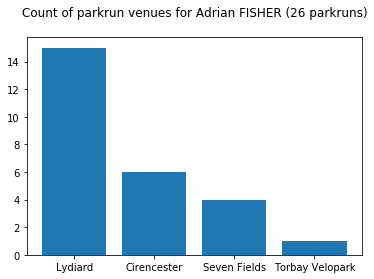

In [29]:
plt.bar(range(len(course_count)), list(course_count.values()), align='center')
plt.xticks(range(len(course_count)), list(course_count.keys()))
plt.title('Count of parkrun venues for ' + runner_name)
#plt.set_xticklabels('Venue Name')
plt.show()

In [30]:
years_tuple = ('2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020')

run_data_clean = []
new_list = []
        
for idx, val in enumerate(run_data):
    if val in years_tuple:
        print(idx, val)
        run_data_clean.append(idx)
        run_data_clean.append(idx + 1)
        run_data_clean.append(idx + 2)
        
        
print(run_data_clean)

for idx, val in enumerate(run_data):
    if idx in run_data_clean:
        print(idx)
    else:
        new_list.append(val)

print(new_list)


0 2017
3 2018
6 2019
9 2020
102 2018
105 2019
108 2020
147 2020
174 2019
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 102, 103, 104, 105, 106, 107, 108, 109, 110, 147, 148, 149, 174, 175, 176]
0
1
2
3
4
5
6
7
8
9
10
11
102
103
104
105
106
107
108
109
110
147
148
149
174
175
176
['15/02/2020', '485', '179', '31:05', '52.06%', '\n                                \xa0\n                                ', '16/11/2019', '471', '210', '29:14', '55.36%', '\n                                \xa0\n                                ', '12/10/2019', '466', '221', '29:21', '55.14%', '\n                                \xa0\n                                ', '17/08/2019', '459', '281', '29:12', '55.42%', '\n                                \xa0\n                                ', '20/07/2019', '456', '273', '29:37', '54.64%', '\n                                \xa0\n                                ', '26/01/2019', '435', '353', '31:02', '51.66%', '\n                                \xa0\n                       

In [31]:
import datetime, time

column_names = ['Run Date', 'Run Number', 'Position', 'Time', 'Age Grade', 'PB?'] # , 'Event Name'

df = pd.DataFrame(np.array(new_list).reshape(-1, 6), columns = list(column_names))

soup_name = BeautifulSoup(webpage, "html.parser", parse_only=SoupStrainer('h2'))
#convert list into dataframe column
df.loc[:,'Event Name'] = event_list
print(df.head(30))

      Run Date Run Number Position   Time Age Grade  \
0   15/02/2020        485      179  31:05    52.06%   
1   16/11/2019        471      210  29:14    55.36%   
2   12/10/2019        466      221  29:21    55.14%   
3   17/08/2019        459      281  29:12    55.42%   
4   20/07/2019        456      273  29:37    54.64%   
5   26/01/2019        435      353  31:02    51.66%   
6   28/04/2018        398      209  28:42    55.87%   
7   21/04/2018        397      219  28:31    56.22%   
8   14/04/2018        396      251  29:43    53.95%   
9   13/01/2018        385      311  29:12    54.45%   
10  06/01/2018        384      286  29:39    53.63%   
11  16/12/2017        380      146  29:56    53.12%   
12  28/10/2017        373      263  28:54    55.02%   
13  09/09/2017        367      323  29:51    53.27%   
14  06/05/2017        352      285  28:47    55.24%   
15  04/01/2020         98      124  33:05    48.92%   
16  21/09/2019         84      141  30:44    52.66%   
17  18/05/

In [32]:
time_list = [] # list created to store times as strings
seconds_list = [] # list created to store times in seconds to allow calculation of standard dev
time_list = df.loc[:, 'Time'].tolist()

#Convert time into seconds to enable calculation of stdev
def get_sec(time_str):
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)

for i in time_list:
    seconds = get_sec(i)
    seconds_list.append(seconds)
print(seconds_list)

[1865, 1754, 1761, 1752, 1777, 1862, 1722, 1711, 1783, 1752, 1779, 1796, 1734, 1791, 1727, 1985, 1844, 1740, 1782, 2314, 1721, 1975, 2169, 1935, 1930, 1702]


In [33]:
# Mean and standard deviation calcs for times
#mean_time = df.loc[:,'Time'].mean()
df.loc[:,'Time_seconds'] = seconds_list
mean_time_s = df.loc[:,'Time_seconds'].mean()
st_dev = round(np.std(seconds_list), 2)

# Max and min values for times
max_value = df.loc[:,'Time'].max()
min_value = df.loc[:,'Time'].min()
#print('Mean time = ', mean_time)
print('Mean time in seconds = ', mean_time_s, 'seconds')
print('Standard Deviation = ', st_dev, 'seconds')
print('Max value = ', max_value)
print('Min value = ', min_value)
#print(df_data2.info())

Mean time in seconds =  1833.1923076923076 seconds
Standard Deviation =  143.41 seconds
Max value =  38:34
Min value =  28:22


In [34]:
#convert mean time in seconds back to hours, minutes, seconds
#full hours

##### DRY - use last function as input for second last and again for first (can't get this to work so commented out)
def min_conv(time_seconds):
    converted_h = int(time_seconds / 3600)
    #remainder hours to be converted to minutes
    converted_h_rem = time_seconds % 3600
    #print(converted_h_rem)
    #full minutes
    return str(int(converted_h_rem / 60))

def sec_conv(time_seconds):
    converted_h = int(time_seconds / 3600)
    #remainder hours to be converted to minutes
    converted_h_rem = time_seconds % 3600
    #full minutes
    converted_m = str(int(converted_h_rem / 60))
    #remainder minutes to be converted to seconds, rounded to 2dp
    return str(int(converted_h_rem % 60))

#def sec_conv(time_seconds):
#    remainder minutes to be converted to seconds, rounded to 2dp
#    converted_m = float(min_conv(time_seconds)) % 60
#    print(converted_m)
#    return str(int(converted_m))

def time_conv(time_seconds):
    converted_h = int(time_seconds / 3600)
    #remainder hours to be converted to minutes
    converted_h_rem = time_seconds % 3600
    #full minutes
    converted_m = int(converted_h_rem / 60)
    #remainder minutes to be converted to seconds, rounded to 2dp
    converted_m_rem = int(converted_h_rem % 60)
    return '0{0}:{1}:{2}'.format(converted_h, converted_m, converted_m_rem)

#print(time_conv(1250))
#print(min_conv(1250))
#print(sec_conv(1250))
 

# As much as it isn't particularly meaningful to calculate summary statistics for my best times, it's a useful learning exercise.
Mean_Time_string = 'The mean of ' + runner_name + ' times is ' +  time_conv(mean_time_s) + ' or ' + min_conv(mean_time_s) + ' minutes and ' + sec_conv(mean_time_s) + ' seconds and the standard deviation is ' + min_conv(st_dev) + ' minutes and ' + sec_conv(st_dev) + ' seconds.'
print(Mean_Time_string)
                                                                    

The mean of Adrian FISHER (26 parkruns)
         times is 00:30:33 or 30 minutes and 33 seconds and the standard deviation is 2 minutes and 23 seconds.


In [35]:
full_times = []

for i in seconds_list:
    convert_time = time_conv(i)
    full_times.append(convert_time)
print(full_times)


['00:31:5', '00:29:14', '00:29:21', '00:29:12', '00:29:37', '00:31:2', '00:28:42', '00:28:31', '00:29:43', '00:29:12', '00:29:39', '00:29:56', '00:28:54', '00:29:51', '00:28:47', '00:33:5', '00:30:44', '00:29:0', '00:29:42', '00:38:34', '00:28:41', '00:32:55', '00:36:9', '00:32:15', '00:32:10', '00:28:22']


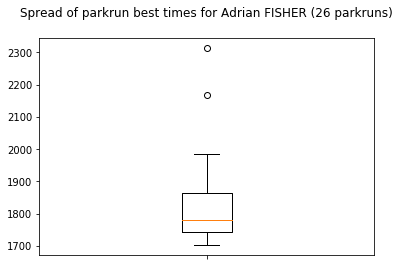

In [36]:
cx = plt.subplot()
plt.boxplot(seconds_list)
plt.title('Spread of parkrun best times for ' + runner_name)
#cx.set_xticks(range(len(seconds_list)))
#cx.set_yticklabels(range(len(seconds_list)))
cx.set_xticklabels('')
plt.show()

#sort axis labels
#remove outliers

In [37]:
import datetime, time
df.loc[:,'Time_new'] = full_times
df.loc[:,'Time_new'] = pd.to_datetime(df.loc[:,'Time_new']).dt.time

In [38]:
#convert dates to datetime format so can filter list on dates
import datetime
#datetime.datetime.strptime('Run Date', "%d%m%Y").date()
df.loc[:,'Run Date'] = pd.to_datetime(df.loc[:,'Run Date'])
#df.loc[:,'Time'] = pd.to_datetime(df.loc[:,'Time']).dt.time #doesn't work - no hour data
print(df.info())
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
Run Date        26 non-null datetime64[ns]
Run Number      26 non-null object
Position        26 non-null object
Time            26 non-null object
Age Grade       26 non-null object
PB?             26 non-null object
Event Name      26 non-null object
Time_seconds    26 non-null int64
Time_new        26 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.0+ KB
None
<bound method NDFrame.head of      Run Date Run Number Position   Time Age Grade  \
0  2020-02-15        485      179  31:05    52.06%   
1  2019-11-16        471      210  29:14    55.36%   
2  2019-12-10        466      221  29:21    55.14%   
3  2019-08-17        459      281  29:12    55.42%   
4  2019-07-20        456      273  29:37    54.64%   
5  2019-01-26        435      353  31:02    51.66%   
6  2018-04-28        398      209  28:42    55.87%   
7  2018-04-21        397      219  28:31

In [39]:
dates = df[(df['Run Date'] > '2016-01-01') & (df['Run Date'] < '2020-02-01') ]
print(dates)

     Run Date Run Number Position   Time Age Grade  \
1  2019-11-16        471      210  29:14    55.36%   
2  2019-12-10        466      221  29:21    55.14%   
3  2019-08-17        459      281  29:12    55.42%   
4  2019-07-20        456      273  29:37    54.64%   
5  2019-01-26        435      353  31:02    51.66%   
6  2018-04-28        398      209  28:42    55.87%   
7  2018-04-21        397      219  28:31    56.22%   
8  2018-04-14        396      251  29:43    53.95%   
9  2018-01-13        385      311  29:12    54.45%   
10 2018-06-01        384      286  29:39    53.63%   
11 2017-12-16        380      146  29:56    53.12%   
12 2017-10-28        373      263  28:54    55.02%   
13 2017-09-09        367      323  29:51    53.27%   
14 2017-06-05        352      285  28:47    55.24%   
16 2019-09-21         84      141  30:44    52.66%   
17 2019-05-18         66      132  29:00    55.80%   
18 2019-04-27         63       89  29:42    54.49%   
19 2019-12-01         49    

In [40]:
# Query to pull out all dates after a certain date and times over a certain amount 
# Specifically to allow me to filter on runs with Oliver 
time_cutoff = '2:30' # insert time you want to filter from
date_limit = '2010-01-01' # insert date you want to filter from

time_conv = get_sec(time_cutoff)

#print(time_conv)

runs_with_O = df[(df['Run Date'] > date_limit) & (df['Time_seconds'] > time_conv)]

print(runs_with_O)


     Run Date Run Number Position   Time Age Grade  \
0  2020-02-15        485      179  31:05    52.06%   
1  2019-11-16        471      210  29:14    55.36%   
2  2019-12-10        466      221  29:21    55.14%   
3  2019-08-17        459      281  29:12    55.42%   
4  2019-07-20        456      273  29:37    54.64%   
5  2019-01-26        435      353  31:02    51.66%   
6  2018-04-28        398      209  28:42    55.87%   
7  2018-04-21        397      219  28:31    56.22%   
8  2018-04-14        396      251  29:43    53.95%   
9  2018-01-13        385      311  29:12    54.45%   
10 2018-06-01        384      286  29:39    53.63%   
11 2017-12-16        380      146  29:56    53.12%   
12 2017-10-28        373      263  28:54    55.02%   
13 2017-09-09        367      323  29:51    53.27%   
14 2017-06-05        352      285  28:47    55.24%   
15 2020-04-01         98      124  33:05    48.92%   
16 2019-09-21         84      141  30:44    52.66%   
17 2019-05-18         66    

In [41]:
# Use pandas to create a new df showing summary data. Can then use this instead of a dictionary for creating the bar chart

print(df.info())

#unique values in list
unique_venues = df.loc[:, 'Event Name'].unique()
print(unique_venues)

#loop through values in unique_venues list to collect summary data
for i in unique_venues:
    fastest = df2.loc[:,'Time'].min()
    rows = [pd.Series([fastest, 100, 20,'Blue','Label_1'], index=df.columns)

SyntaxError: unexpected EOF while parsing (<ipython-input-41-cc221b9da81a>, line 12)

In [1]:
""" Practice stuff

while 1:

    menu = "What would you like to do? \n 1. Enter your ID number \n 2. Exit \n Enter an option."

    x = int(input(menu))
    
    if x == 1:
    
        parkrun_id = int(input("Enter the numerical part of your parkrun id (excluding the A prefix) "))

        #if isinstance(parkrun_id, int):


        print("Hello")




    elif x == 2:
        print("Good bye!")
        break
        
    else:
        print("Not a valid input. Try again.")
        

    """

What would you like to do? 
 1. Enter your ID number 
 2. Exit 
 Enter an option.1
Enter the numerical part of your parkrun id (excluding the A prefix) 321
Hello
What would you like to do? 
 1. Enter your ID number 
 2. Exit 
 Enter an option.1
Enter the numerical part of your parkrun id (excluding the A prefix) 1.2


ValueError: invalid literal for int() with base 10: '1.2'